# Major Project

## Topic : Used Car Price Prediction
#### Solution by:- **Anurag Singh**

#### In this Major Project, we are given a dataset of used cars. We have to perform EDA i.e.(Exploratory Data Analysis) to get a deep insight of the data, measure the effect of different factors on the Price feature and build different regression models to get better accuracy for the Price prediction.

Problem Statement: You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

Price: The price of the used car in INR Lakhs.

- **Importing the libraries**:-

In [1]:
import pandas as pd                     #for data preprocessing
import numpy as np                      #for working with arrays and its useful functions
import matplotlib.pyplot as plt         #for data visualization
%matplotlib inline
import seaborn as sns                   #for data visualization

import warnings                         #for ignoring any unnecessary warnings
warnings.filterwarnings("ignore")

import missingno as msno                #for visualizing missing values precisely

The libraries have been imported in the notebook.<br>
The "%matplotlib inline" is used to display the visual images in the notebook itself.

### Data Preprocessing

- **Importing the dataset**:-

In [2]:
#save the dataset .ipynb file and this file in the same directory
#reading dataset in the notebook

df_train = pd.read_excel("Data_Train.xlsx")
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [3]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


- **To know the total number of cars**:-

In [4]:
df_train.shape

(6019, 12)

Hence, we get to know that there are **6019 cars** in total and **12** columns.<br>
**Price** is dependent feature whereas the rest are independent features.

In [5]:
#to know about the index
df_train.index

RangeIndex(start=0, stop=6019, step=1)

- **To know the columns**:-

In [6]:
#to get the columns
df_train.columns.to_list()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

There are **12 columns** in total.

- **To know about the data type of each column**:-

In [7]:
#to know about the data types of each column
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

We observe that, there are **8 columns** of **categorical** data type whereas **4 columns** of **numerical** data type.

- **To get the summary statistics of the dataset**:-

In [8]:
#to get the summary statistics
df_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


- **To know about the brief description of the dataset**:-

In [9]:
#to get the brief detail about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


- **To find how many unique values are there in each column**:-

In [10]:
df_train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

- **To find if there are any missing(null/nan) values or not**:-

In [11]:
#to check missing data
df_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

We observe that, there are **few** missing values in 'Mileage', 'Engine', 'Power' and 'Seats' columns, so we need to handle them.

- **Visual insight of the missing values**:-

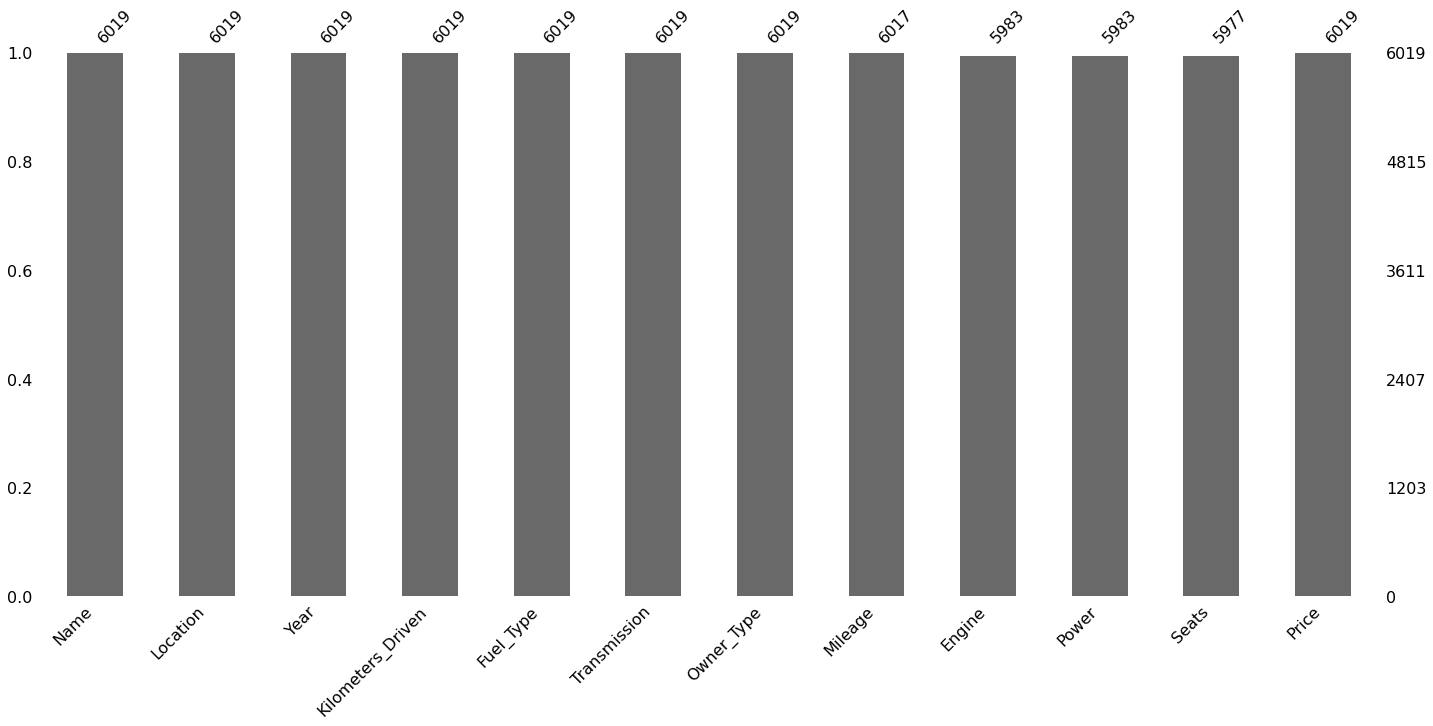

In [12]:
msno.bar(df_train)

It is very helpful through the above graph in cases where **there are missing values**, to know that:-
- whether we want to replace the missing values with some other values **or**
- whether we want to completely remove the column if it is not much relevant in analysis.

- **To know the percentage of missing values in each column**:-

In [13]:
(df_train.isnull().sum() / df_train.shape[0]) * 100

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.033228
Engine               0.598106
Power                0.598106
Seats                0.697790
Price                0.000000
dtype: float64

We can see that no column has >=1% of the missing values, so we can handle them easily as the dataset is not large.

### Data Cleaning

- **"Mileage" column handling**:-

In [14]:
M = df_train.groupby('Mileage')['Mileage'].agg('count')
M

Mileage
0.0 kmpl      68
10.0 kmpl     10
10.1 kmpl      7
10.13 kmpl     3
10.2 kmpl      6
              ..
9.52 kmpl      2
9.7 kmpl       1
9.74 kmpl      2
9.8 kmpl       4
9.9 kmpl       3
Name: Mileage, Length: 442, dtype: int64

In [15]:
df_train['Mileage'] = df_train['Mileage'].str.replace('kmpl','')
df_train['Mileage'] = df_train['Mileage'].str.replace('km/kg','')

In [16]:
df_train['Mileage'][df_train['Mileage'] == '0.0 '] = np.nan

In [17]:
df_train['Mileage'] = df_train['Mileage'].astype(float)

In [18]:
df_train['Mileage'].mode()

0    17.0
dtype: float64

In [19]:
df_train['Mileage'].fillna(value = 17.0, inplace = True)

In [20]:
print(df_train['Mileage'].dtype)
df_train.isnull().sum()

float64


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

- **"Engine" column handling**:-

In [21]:
E = df_train.groupby('Engine')['Engine'].agg('count')
E

Engine
1047 CC      4
1061 CC     30
1086 CC    108
1120 CC     54
1150 CC      7
          ... 
970 CC       1
993 CC      14
995 CC      10
998 CC     259
999 CC      29
Name: Engine, Length: 146, dtype: int64

In [22]:
df_train['Engine'] = df_train['Engine'].str.replace('CC','')

In [23]:
df_train['Engine'] = df_train['Engine'].astype(float)

In [24]:
df_train['Engine'].mode()

0    1197.0
dtype: float64

In [25]:
df_train['Engine'].fillna(value = 1197.0, inplace = True)

In [26]:
print(df_train['Engine'].dtype)
df_train.isnull().sum()

float64


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                42
Price                 0
dtype: int64

- **"Power" column handling**:-

In [27]:
P = df_train.groupby('Power')['Power'].agg('count')
P

Power
100 bhp       55
100.6 bhp     39
101 bhp        4
102 bhp       57
102.5 bhp      8
            ... 
98.82 bhp      2
98.96 bhp      9
99 bhp        18
99.6 bhp       5
null bhp     107
Name: Power, Length: 372, dtype: int64

In [28]:
df_train['Power'] = df_train['Power'].str.replace('bhp','')

In [29]:
df_train['Power'][df_train['Power'] == 'null '] = np.nan

In [30]:
# after converting null to nan, we are checking total nan values
df_train['Power'].isnull().sum()

143

In [31]:
df_train['Power'] = df_train['Power'].astype(float)

In [32]:
df_train['Power'].mode()

0    74.0
dtype: float64

In [33]:
df_train['Power'].fillna(value = 74.0, inplace = True)

In [34]:
print(df_train['Power'].dtype)
df_train.isnull().sum()

float64


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
Price                 0
dtype: int64

- **"Seats" column handling**:-

In [35]:
S = df_train.groupby('Seats')['Seats'].agg('count')
S

Seats
0.0        1
2.0       16
4.0       99
5.0     5014
6.0       31
7.0      674
8.0      134
9.0        3
10.0       5
Name: Seats, dtype: int64

In [36]:
df_train['Seats'].mode()

0    5.0
dtype: float64

In [37]:
df_train['Seats'][df_train['Seats'] == 0.0] = 5.0
df_train["Seats"].fillna(value = 5.0, inplace=True)

In [38]:
print(df_train['Seats'].dtype)
df_train.isnull().sum()

float64


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

As we can see above, all the **null values are handled successfully**.

- **Converting 2 features("Year", "Kilometers_Driven") from 'int' to 'float'**:-

In [39]:
df_train['Year'] = df_train['Year'].astype(float)
df_train['Kilometers_Driven'] = df_train['Kilometers_Driven'].astype(float)

In [40]:
df_train.dtypes

Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

As we can see above, now we have **5 categorical** features and **7 numerical** features.

### Feature Engineering

In [41]:
df_train.head(25)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012.0,75000.0,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013.0,86999.0,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016.0,36000.0,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013.0,64430.0,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012.0,65932.0,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,1.95


- **Name** column:-

In [42]:
df_train['Name'] = df_train['Name'].str.split(' ').str[0]
df_train.groupby('Name')['Name'].agg('count')

Name
Ambassador          1
Audi              236
BMW               267
Bentley             1
Chevrolet         121
Datsun             13
Fiat               28
Force               3
Ford              300
Honda             608
Hyundai          1107
ISUZU               2
Isuzu               1
Jaguar             40
Jeep               15
Lamborghini         1
Land               60
Mahindra          272
Maruti           1211
Mercedes-Benz     318
Mini               26
Mitsubishi         27
Nissan             91
Porsche            18
Renault           145
Skoda             173
Smart               1
Tata              186
Toyota            411
Volkswagen        315
Volvo              21
Name: Name, dtype: int64

In [43]:
df_train['Name'][df_train['Name'] == 'Isuzu'] = 'ISUZU'
df_train['Name'][df_train['Name'] == 'Land'] = 'Land Rover'

In [44]:
df_train['Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               3
Smart               1
Ambassador          1
Lamborghini         1
Bentley             1
Name: Name, dtype: int64

In [45]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


Clean dataset is obtained, as shown above.

### Duplicate Rows Handling(if any):-

- **Checking for any duplicate rows**:-

In [46]:
df_train.duplicated().value_counts()

False    6017
True        2
dtype: int64

As we can see, there are **2 duplicated rows(4 rows in total)**.

- **Viewing the first set of duplicate rows**:-

In [47]:
df_train.loc[df_train.duplicated(keep='first'), :]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2940,Maruti,Kolkata,2016.0,29000.0,Diesel,Manual,First,27.39,1248.0,74.0,5.0,6.50
4781,Maruti,Hyderabad,2007.0,52195.0,Petrol,Manual,First,19.70,796.0,46.3,5.0,1.75


- **Viewing the last set of duplicate rows**:-

In [48]:
df_train.loc[df_train.duplicated(keep='last'), :]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
942,Maruti,Kolkata,2016.0,29000.0,Diesel,Manual,First,27.39,1248.0,74.0,5.0,6.50
3623,Maruti,Hyderabad,2007.0,52195.0,Petrol,Manual,First,19.70,796.0,46.3,5.0,1.75


- **Dropping the last set of duplicate rows from the dataset and keeping the first set only in the dataset**:-

In [49]:
df_train = df_train.drop_duplicates(keep='first')

- **Checking after handling the duplicate rows**:-

In [50]:
df_train.duplicated().value_counts()

False    6017
dtype: int64

As shown above, **all duplicate rows are handled successfully**.

### Data Visualization & Feature Scaling

- **Name** column:-

Maruti           1209
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               3
Smart               1
Ambassador          1
Lamborghini         1
Bentley             1
Name: Name, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

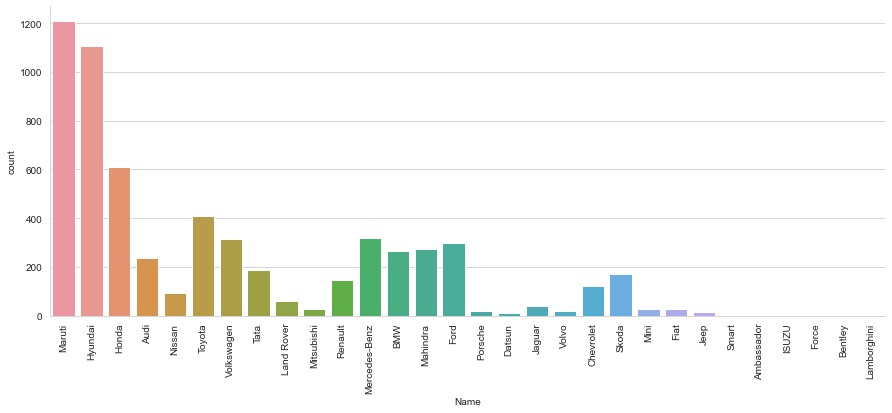

In [51]:
print(df_train['Name'].value_counts())

sns.set_style("whitegrid")
sns.catplot(x="Name", data=df_train, kind="count", aspect=2.5)
plt.xticks(rotation=90)

**Maruti** brand **has maximum number of cars**, followed by **Hyundai** and **Honda** whereas, brands like **Ambassador, Bentley, Smart, Lamborghini have only 1 car** in the dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

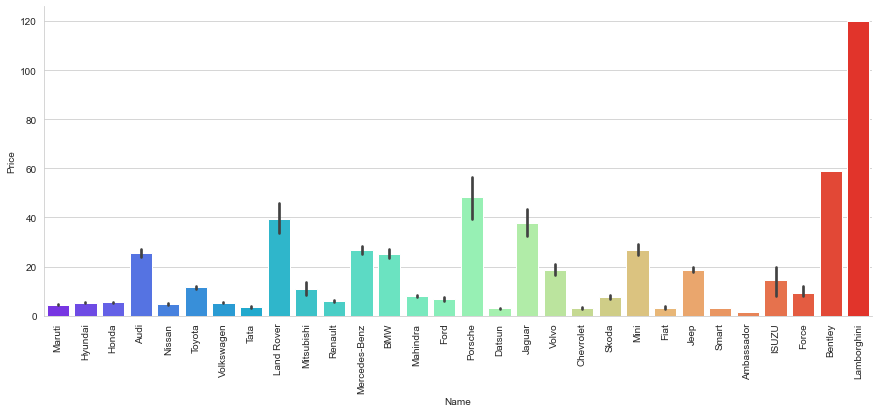

In [52]:
sns.set_style("whitegrid")
sns.catplot(x='Name', y='Price', data=df_train, kind="bar", palette='rainbow', aspect=2.5) 
plt.xticks(rotation=90)
#these black lines are the region where 95% of the values lie

**Lamborghini is one of the most expensive car** followed by **Bentley and Porsche** whereas, **Ambassador is the cheapest**.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

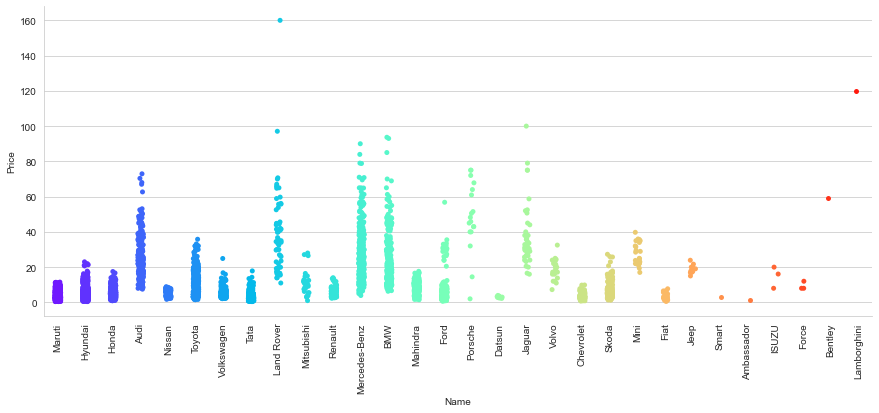

In [53]:
sns.set_style("whitegrid")
sns.catplot(x='Name', y='Price', data=df_train, kind="strip", palette='rainbow', aspect=2.5) 
plt.xticks(rotation=90)

**Land Rover has one model that is the more expensive than Lamborghini**.

- **Location** column:-

Mumbai        790
Hyderabad     741
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       534
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64


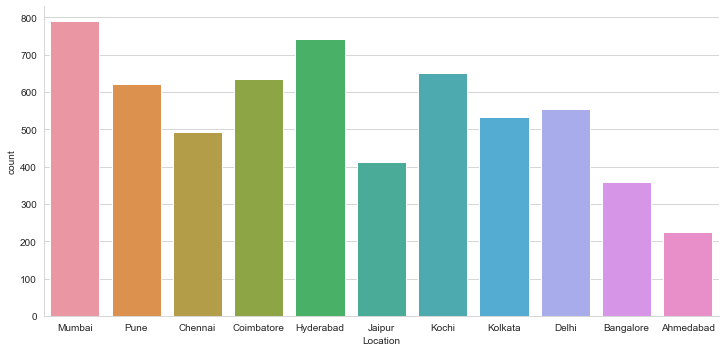

In [54]:
print(df_train['Location'].value_counts())

sns.set_style("whitegrid")
sns.catplot(x="Location", data=df_train, kind="count", aspect=2)

**Mumbai has maximum number of cars** followed by **Hyderabad then Kochi** whereas, **Ahmedabad has the least number of cars**.

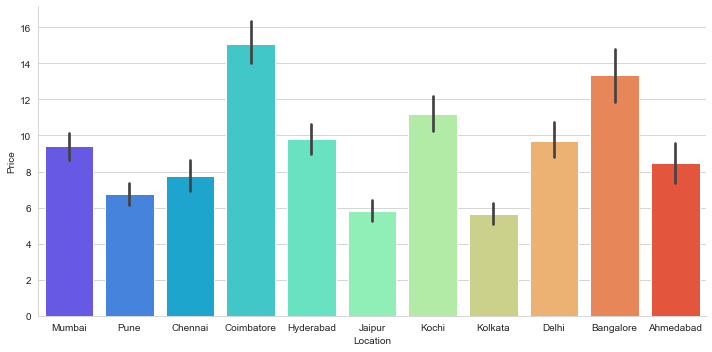

In [55]:
sns.set_style("whitegrid")
sns.catplot(x='Location', y='Price', data=df_train, kind="bar", palette='rainbow', aspect=2) 

Location-wise, **Coimbatore has the most expensive cars**, followed by **Bangalore**, whereas **Kolkata and Jaipur** has **more affordable/less costly cars**.

- **Year** column:-

2014.0    797
2015.0    744
2016.0    740
2013.0    649
2017.0    587
2012.0    580
2011.0    466
2010.0    342
2018.0    298
2009.0    198
2008.0    174
2007.0    124
2019.0    102
2006.0     78
2005.0     57
2004.0     31
2003.0     17
2002.0     15
2001.0      8
1998.0      4
2000.0      4
1999.0      2
Name: Year, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

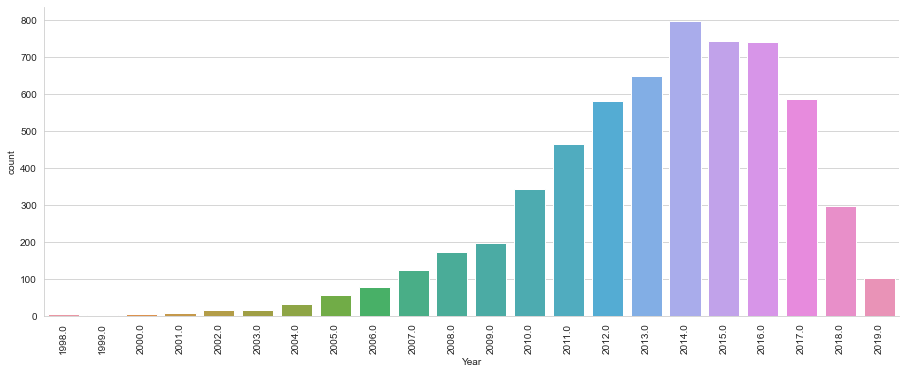

In [56]:
print(df_train['Year'].value_counts())

sns.set_style("whitegrid")
sns.catplot(x="Year", data=df_train, kind="count", aspect=2.5)
plt.xticks(rotation=90)

Year-wise, We can see a **little positive skewed distribution, maximum cars are of 2014 edition**, followed by **2015 and 2016 editions** whereas, **1999 edition** cars are the **least**.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

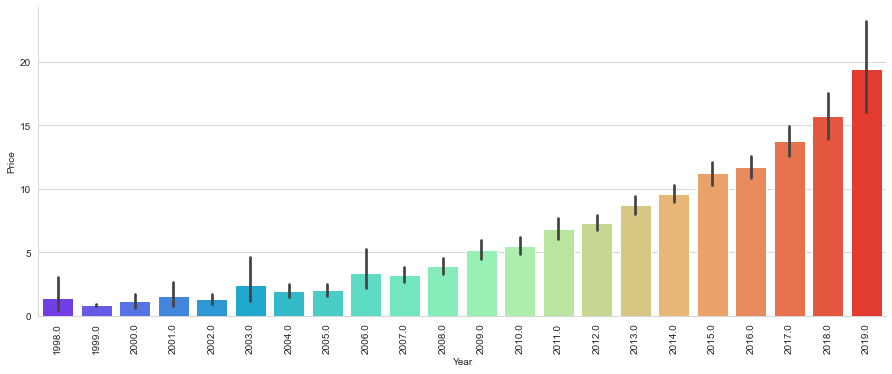

In [57]:
sns.set_style("whitegrid")
sns.catplot(x='Year', y='Price', data=df_train, kind="bar", palette='rainbow', aspect=2.5)
plt.xticks(rotation=90)

As expected, **the newer the edition of the car, the more expensive it is**.

- **Kilometers_Driven** column:-

60000.0    82
45000.0    70
65000.0    68
50000.0    61
70000.0    60
           ..
25948.0     1
42831.0     1
54996.0     1
77469.0     1
88578.0     1
Name: Kilometers_Driven, Length: 3093, dtype: int64


Text(0.5, 0, 'Kilometers Driven')

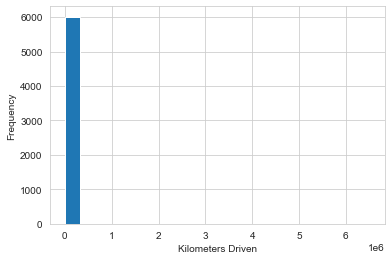

In [58]:
print(df_train['Kilometers_Driven'].value_counts())

sns.set_style("whitegrid")
df_train['Kilometers_Driven'].plot(kind='hist', bins=20)
plt.xlabel("Kilometers Driven")

Most cars are driven **60,000 Kms** on an average by the previous owner(if any).

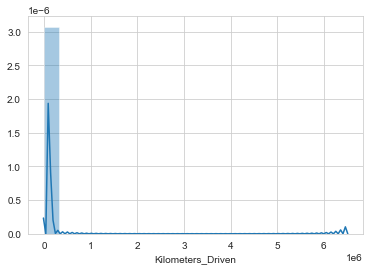

In [59]:
sns.set_style("whitegrid")
sns.distplot(df_train['Kilometers_Driven'], kde=True, bins=20)

The Normal Distribution is not seen here.

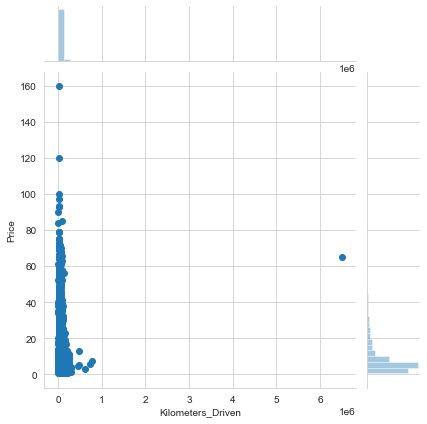

In [60]:
sns.set_style('whitegrid')
sns.jointplot(x='Kilometers_Driven', y='Price', data=df_train, kind='scatter')

- **To fix this, feature scaling is applied**:-

In [61]:
df_train['Kilometers_Driven'].skew()

58.716346346637046

In [62]:
df_train['Kilometers_Driven'] = np.log(df_train['Kilometers_Driven'])
df_train['Kilometers_Driven'].skew()

-1.2909183983942725

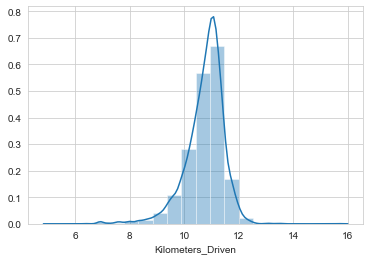

In [63]:
sns.set_style("whitegrid")
sns.distplot(df_train['Kilometers_Driven'], kde=True, bins=20)

As you can see, now the Normal Distribution is achieved and skew is under acceptable range.

- **Fuel_Type** column:-

Diesel      3204
Petrol      2745
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64


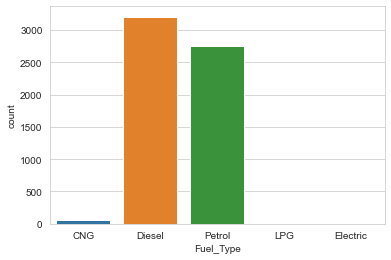

In [64]:
print(df_train['Fuel_Type'].value_counts())

sns.set_style("whitegrid")
sns.countplot(df_train['Fuel_Type'])

**Maximum cars are Diesel driven**, followed by **Petrol** whereas, **Electric cars are minimum** in numbers.

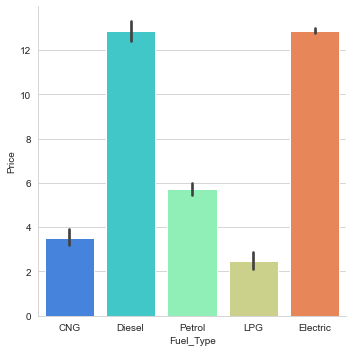

In [65]:
sns.set_style("whitegrid")
sns.catplot(x='Fuel_Type', y='Price', data=df_train, kind="bar", palette='rainbow') 

On the basis of Fuel Type, **Diesel driven cars are most expensive** followed by **Electric** whereas, **LPG driven cars are cheapest**.

- **Transmission** column:-

Manual       4297
Automatic    1720
Name: Transmission, dtype: int64


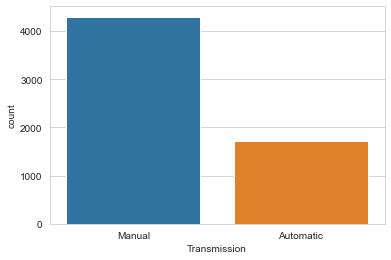

In [66]:
print(df_train['Transmission'].value_counts())

sns.set_style("whitegrid")
sns.countplot(df_train['Transmission'])

**Maximum cars have Manual Transmission** whereas, **<2000 cars have Automatic Transmission**.

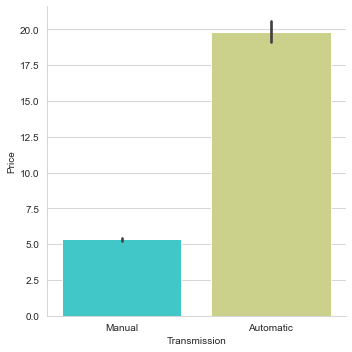

In [67]:
sns.set_style("whitegrid")
sns.catplot(x='Transmission', y='Price', data=df_train, kind="bar", palette='rainbow') 

As expected, **Automatic Transmission cars are more expensive than Manual Transmission cars**.

- **Owner_Type** column:-

First             4927
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64


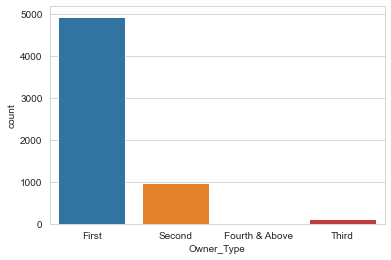

In [68]:
print(df_train['Owner_Type'].value_counts())

sns.set_style("whitegrid")
sns.countplot(df_train['Owner_Type'])

**Maximum cars are 1st hand** whereas, **only <10 cars 4th hand and above**.

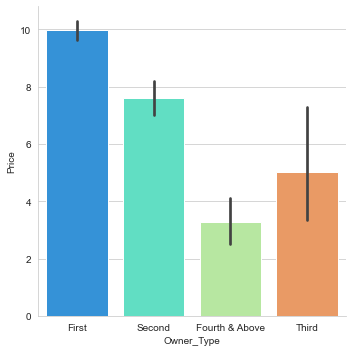

In [69]:
sns.set_style("whitegrid")
sns.catplot(x='Owner_Type', y='Price', data=df_train, kind="bar", palette='rainbow') 

As expected, **1st hand cars are most expensive** whereas, **4th hand and above cars are the cheapest**.

- **Mileage** column:-

17.00    243
18.90    172
18.60    119
20.36     88
21.10     87
        ... 
9.70       1
13.29      1
12.97      1
23.01      1
14.45      1
Name: Mileage, Length: 429, dtype: int64


Text(0.5, 0, 'Mileage')

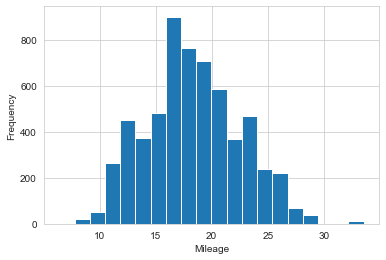

In [70]:
print(df_train['Mileage'].value_counts())

sns.set_style("whitegrid")
df_train['Mileage'].plot(kind='hist', bins=20)
plt.xlabel("Mileage")

**Maximum cars give a mileage of 17 kmpl**, which is good.

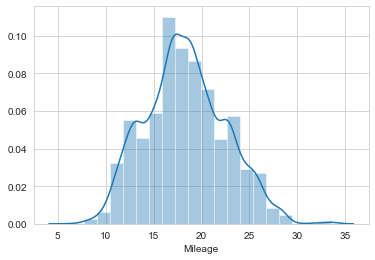

In [71]:
sns.set_style("whitegrid")
sns.distplot(df_train['Mileage'], kde=True, bins=20)

Normal Distribution is achieved here, so feature scaling is not required as skew is acceptable.

In [72]:
df_train['Mileage'].skew()

0.22217822957598587

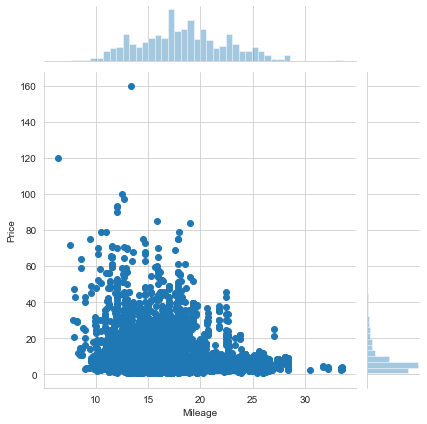

In [73]:
sns.set_style("whitegrid")
sns.jointplot(x='Mileage', y='Price', data=df_train, kind='scatter')

- **Engine** column:-

1197.0    642
1248.0    511
1498.0    304
998.0     259
2179.0    240
         ... 
2149.0      1
3197.0      1
2694.0      1
970.0       1
2999.0      1
Name: Engine, Length: 146, dtype: int64


Text(0.5, 0, 'Engine')

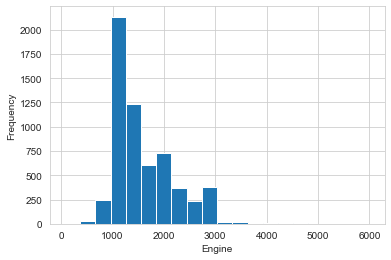

In [74]:
print(df_train['Engine'].value_counts())

sns.set_style("whitegrid")
df_train['Engine'].plot(kind='hist', bins=20)
plt.xlabel("Engine")

**Maximum cars belong to 1197 cc category(1.2 Litre)**.

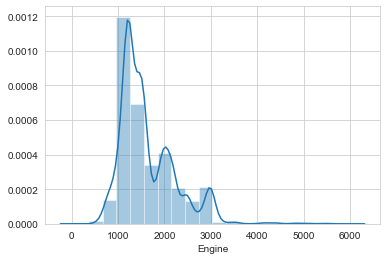

In [75]:
sns.set_style("whitegrid")
sns.distplot(df_train['Engine'], kde=True, bins=20)

The graph is somewhat skewd.

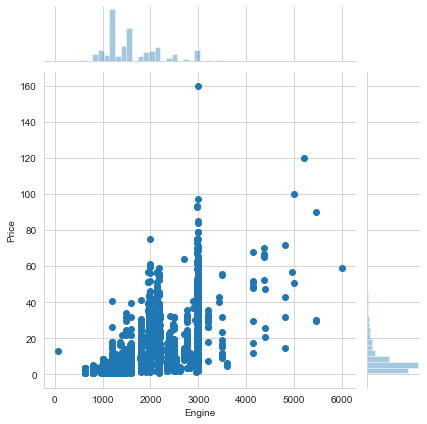

In [76]:
sns.set_style("whitegrid")
sns.jointplot(x='Engine', y='Price', data=df_train, kind='scatter')

- **To fix this, feature scaling is applied**:-

In [77]:
df_train['Engine'].skew()

1.4300127702904457

In [78]:
df_train['Engine'] = np.log(df_train['Engine'])
df_train['Engine'].skew()

0.306691958556647

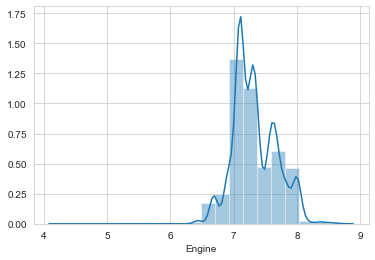

In [79]:
sns.set_style("whitegrid")
sns.distplot(df_train['Engine'], kde=True, bins=20)

As you can see, now the Normal Distribution is achieved and skew is under acceptable range.

- **Power** column:-

74.00     377
98.60     131
73.90     125
140.00    123
88.50     112
         ... 
254.00      1
103.00      1
301.73      1
261.00      1
114.40      1
Name: Power, Length: 369, dtype: int64


Text(0.5, 0, 'Power')

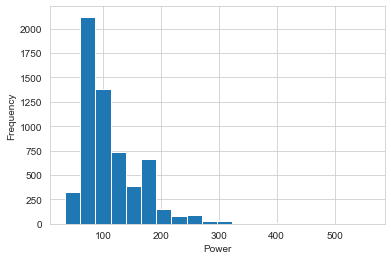

In [80]:
print(df_train['Power'].value_counts())

sns.set_style("whitegrid")
df_train['Power'].plot(kind='hist', bins=20)
plt.xlabel("Power")

**Maximum cars are having power of 74 bhp(<100 bhp)**.

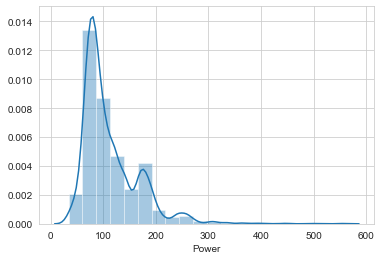

In [81]:
sns.set_style("whitegrid")
sns.distplot(df_train['Power'], kde=True, bins=20)

The graph is is somewhat skewd.

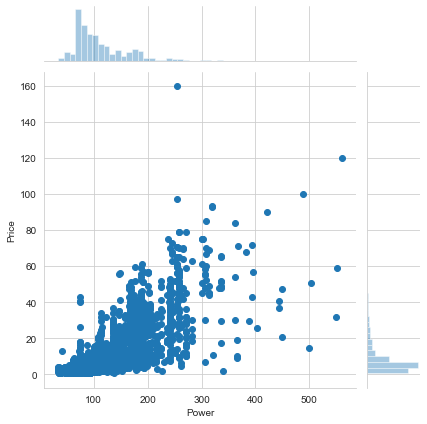

In [82]:
sns.set_style("whitegrid")
sns.jointplot(x='Power', y='Price', data=df_train, kind='scatter')

- **To fix this, feature scaling is applied**:-

In [83]:
df_train['Power'].skew()

1.9464805461677797

In [84]:
df_train['Power'] = np.log(df_train['Power'])
df_train['Power'].skew()

0.48713765809733783

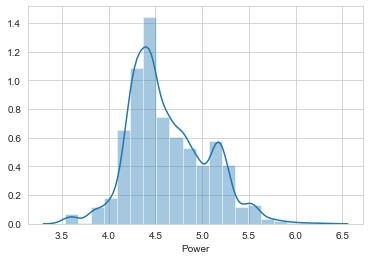

In [85]:
sns.set_style("whitegrid")
sns.distplot(df_train['Power'], kde=True, bins=20)

As you can see, now the Normal Distribution is achieved and skew is under acceptable range.

- **Seats** column:-

5.0     5055
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: Seats, dtype: int64


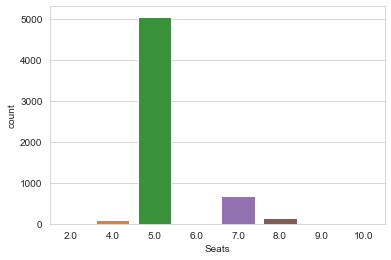

In [86]:
print(df_train['Seats'].value_counts())

sns.set_style("whitegrid")
sns.countplot(df_train['Seats'])

**Maximum number of cars are 5 seater**.

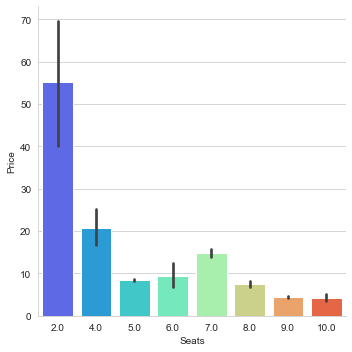

In [87]:
sns.set_style("whitegrid")
sns.catplot(x='Seats', y='Price', data=df_train, kind="bar", palette='rainbow') 

As expected, **2 seater cars(sports car) are the most expensive**.

- **Price** column:-

4.50     88
5.50     84
3.50     82
4.25     73
3.25     71
         ..
11.96     1
5.76      1
24.99     1
42.75     1
16.42     1
Name: Price, Length: 1373, dtype: int64


Text(0.5, 0, 'Price')

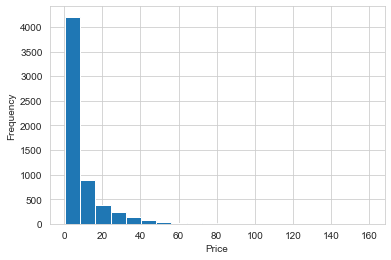

In [88]:
print(df_train['Price'].value_counts())

sns.set_style("whitegrid")
df_train['Price'].plot(kind='hist', bins=20)
plt.xlabel("Price")

**Most of the cars are in the affordable range(3 to 5 lakhs)**.

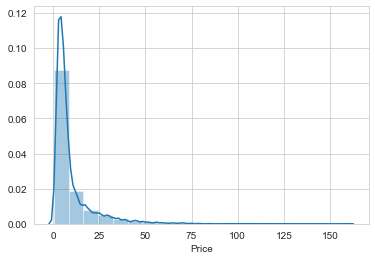

In [89]:
sns.set_style("whitegrid")
sns.distplot(df_train['Price'], kde=True, bins=20)

Normal Distribution is not present.

- **To fix this, feature scaling is applied**:-

In [90]:
df_train['Price'].skew()

3.334714565649966

In [91]:
df_train['Price'] = np.log(df_train['Price'])
df_train['Price'].skew()

0.41734900906449923

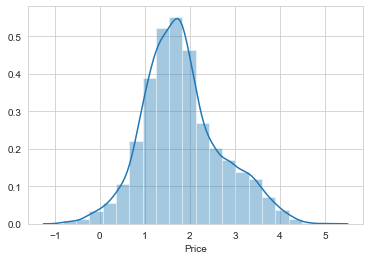

In [92]:
sns.set_style("whitegrid")
sns.distplot(df_train['Price'], kde=True, bins=20)

As you can see, now the Normal Distribution is achieved and skew is under acceptable range.

### Finding Correlations

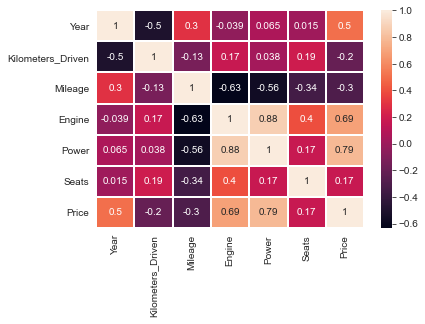

In [93]:
sns.heatmap(df_train.corr(), annot=True, linewidths=1, linecolor='white')

**"Power" and "Engine" features are strongly positively correlated with "Price"** whereas, **"Mileage" and "Kilometers_Driven" features are strongly negatively correlated with "Price"**.

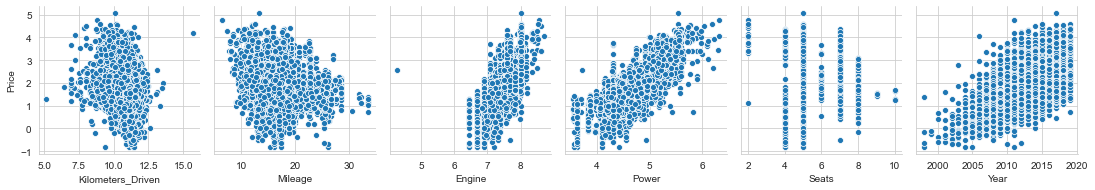

In [94]:
sns.pairplot(data=df_train, y_vars='Price', x_vars=['Kilometers_Driven','Mileage','Engine','Power','Seats','Year'])

The above visuals verify the correlation matrix obtained above.

In [95]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010.0,11.184421,CNG,Manual,First,26.60,6.905753,4.063198,5.0,0.559616
1,Hyundai,Pune,2015.0,10.621327,Diesel,Manual,First,19.67,7.366445,4.837868,5.0,2.525729
2,Honda,Chennai,2011.0,10.736397,Petrol,Manual,First,18.20,7.089243,4.485260,5.0,1.504077
3,Maruti,Chennai,2012.0,11.373663,Diesel,Manual,First,20.77,7.129298,4.485936,7.0,1.791759
4,Audi,Coimbatore,2013.0,10.613246,Diesel,Automatic,Second,15.20,7.584773,4.947340,5.0,2.875822


In [96]:
df_train.dtypes

Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

- **Getting the details about Categorical Features in our dataset**:-

In [97]:
print("NUMERICAL INDEPENDENT FEATURES:-")
print("Different categories in Year column is : ",df_train['Year'].nunique())
print("Different categories in Kilometers_Driven column is : ",df_train['Kilometers_Driven'].nunique())
print("Different categories in Mileage column is : ",df_train['Mileage'].nunique())
print("Different categories in Engine column is : ",df_train['Engine'].nunique())
print("Different categories in Power column is : ",df_train['Power'].nunique())
print("Different categories in Seats column is : ",df_train['Seats'].nunique())
print()
print("CATEGORICAL INDEPENDENT FEATURES:-")
print("Different categories in Name column is : ",df_train['Name'].nunique())
print("Different categories in Location column is : ",df_train['Location'].nunique())
print("Different categories in Fuel_Type column is : ",df_train['Fuel_Type'].nunique())
print("Different categories in Transmission column is : ",df_train['Transmission'].nunique())
print("Different categories in Owner_Type column is : ",df_train['Owner_Type'].nunique())

NUMERICAL INDEPENDENT FEATURES:-
Different categories in Year column is :  22
Different categories in Kilometers_Driven column is :  3093
Different categories in Mileage column is :  429
Different categories in Engine column is :  146
Different categories in Power column is :  369
Different categories in Seats column is :  8

CATEGORICAL INDEPENDENT FEATURES:-
Different categories in Name column is :  30
Different categories in Location column is :  11
Different categories in Fuel_Type column is :  5
Different categories in Transmission column is :  2
Different categories in Owner_Type column is :  4


In [98]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_train, title="Pandas Profiling Report", explorative=True)
# profile.to_notebook_iframe()
# df_train = pd.get_dummies(df_train, drop_first = True)
# df_train.head()

- **Copying data for Machine Learning algorithms**:-

In [99]:
df_train_e = df_train.copy()

### Converting Categorical Features to Numerical Features

- **Performing Ordinal Encoding in "Owner_Type" column**:-

In [100]:
df_train_e['Owner_Type'].value_counts()

First             4927
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [101]:
Owner_Type_labels = {'First':4, 'Second':3, 'Third':2, 'Fourth & Above':1}

In [102]:
df_train_e["Owner_Type_encoded"] = df_train_e['Owner_Type'].map(Owner_Type_labels)

In [103]:
df_train_e.drop('Owner_Type', axis='columns', inplace=True)

In [104]:
df_train_e.head(25)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price,Owner_Type_encoded
0,Maruti,Mumbai,2010.0,11.184421,CNG,Manual,26.60,6.905753,4.063198,5.0,0.559616,4
1,Hyundai,Pune,2015.0,10.621327,Diesel,Manual,19.67,7.366445,4.837868,5.0,2.525729,4
2,Honda,Chennai,2011.0,10.736397,Petrol,Manual,18.20,7.089243,4.485260,5.0,1.504077,4
3,Maruti,Chennai,2012.0,11.373663,Diesel,Manual,20.77,7.129298,4.485936,7.0,1.791759,4
4,Audi,Coimbatore,2013.0,10.613246,Diesel,Automatic,15.20,7.584773,4.947340,5.0,2.875822,3
5,Hyundai,Hyderabad,2012.0,11.225243,LPG,Manual,21.10,6.701960,4.010963,5.0,0.854415,4
6,Nissan,Jaipur,2013.0,11.373652,Diesel,Manual,23.08,7.286876,4.144721,5.0,1.252763,4
7,Toyota,Mumbai,2016.0,10.491274,Diesel,Automatic,11.36,7.921173,5.144583,8.0,2.862201,4
8,Volkswagen,Pune,2013.0,11.073335,Diesel,Manual,20.54,7.376508,4.640537,5.0,1.648659,4
9,Tata,Chennai,2012.0,11.096379,Diesel,Manual,22.30,7.129298,4.304065,5.0,0.667829,3


In [105]:
df_train_e.dtypes

Name                   object
Location               object
Year                  float64
Kilometers_Driven     float64
Fuel_Type              object
Transmission           object
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
Owner_Type_encoded      int64
dtype: object

- **To convert 'Object' data type to 'Numerical' so that Machine Learning algorithms can interpret them, we do th following**:-

- **Performing One Hot Encoding in our dataset**:-

In [106]:
df_train_e = pd.get_dummies(df_train_e, drop_first=True)
df_train_e.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Owner_Type_encoded,Name_Audi,Name_BMW,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010.0,11.184421,26.60,6.905753,4.063198,5.0,0.559616,4,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2015.0,10.621327,19.67,7.366445,4.837868,5.0,2.525729,4,0,0,...,0,0,0,0,1,1,0,0,0,1
2,2011.0,10.736397,18.20,7.089243,4.485260,5.0,1.504077,4,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2012.0,11.373663,20.77,7.129298,4.485936,7.0,1.791759,4,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2013.0,10.613246,15.20,7.584773,4.947340,5.0,2.875822,3,1,0,...,0,0,0,0,0,1,0,0,0,0


In [107]:
df_train_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 6017 non-null   float64
 1   Kilometers_Driven    6017 non-null   float64
 2   Mileage              6017 non-null   float64
 3   Engine               6017 non-null   float64
 4   Power                6017 non-null   float64
 5   Seats                6017 non-null   float64
 6   Price                6017 non-null   float64
 7   Owner_Type_encoded   6017 non-null   int64  
 8   Name_Audi            6017 non-null   uint8  
 9   Name_BMW             6017 non-null   uint8  
 10  Name_Bentley         6017 non-null   uint8  
 11  Name_Chevrolet       6017 non-null   uint8  
 12  Name_Datsun          6017 non-null   uint8  
 13  Name_Fiat            6017 non-null   uint8  
 14  Name_Force           6017 non-null   uint8  
 15  Name_Ford            6017 non-null   u

In [108]:
df_train_e.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Owner_Type_encoded', 'Name_Audi', 'Name_BMW', 'Name_Bentley',
       'Name_Chevrolet', 'Name_Datsun', 'Name_Fiat', 'Name_Force', 'Name_Ford',
       'Name_Honda', 'Name_Hyundai', 'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep',
       'Name_Lamborghini', 'Name_Land Rover', 'Name_Mahindra', 'Name_Maruti',
       'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi', 'Name_Nissan',
       'Name_Porsche', 'Name_Renault', 'Name_Skoda', 'Name_Smart', 'Name_Tata',
       'Name_Toyota', 'Name_Volkswagen', 'Name_Volvo', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

- **Splitting the dataset as dependent and independent features**:-

In [109]:
independent_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Owner_Type_encoded', 'Name_Audi', 'Name_BMW', 'Name_Bentley',
       'Name_Chevrolet', 'Name_Datsun', 'Name_Fiat', 'Name_Force', 'Name_Ford',
       'Name_Honda', 'Name_Hyundai', 'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep',
       'Name_Lamborghini', 'Name_Land Rover', 'Name_Mahindra', 'Name_Maruti',
       'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi', 'Name_Nissan',
       'Name_Porsche', 'Name_Renault', 'Name_Skoda', 'Name_Smart', 'Name_Tata',
       'Name_Toyota', 'Name_Volkswagen', 'Name_Volvo', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']

X = df_train_e[independent_columns]
y = df_train_e['Price']

In [110]:
y      #just to cross-verify from the dataset

0       0.559616
1       2.525729
2       1.504077
3       1.791759
4       2.875822
          ...   
6014    1.558145
6015    1.386294
6016    1.064711
6017    0.974560
6018    0.916291
Name: Price, Length: 6017, dtype: float64

### Machine Learning algorithms

In [111]:
from sklearn.model_selection import train_test_split           #for train-test splitting

from sklearn.linear_model import LinearRegression              #for linear Regression
from sklearn.tree import DecisionTreeRegressor                 #for Decision Tree
from sklearn.ensemble import RandomForestRegressor             #for Random Forest
from sklearn.linear_model import Ridge                         #for Ridge Regression
from sklearn.linear_model import Lasso                         #for Lasso Regression

import statsmodels.api as sm                                   #for Statistical Summary and details

from sklearn.metrics import mean_squared_error                 #for checking error

- **Train-Test splitting**:-

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

- **This is a Regression Problem, so we will use Regression models**:-

### Linear Regression

In [113]:
regressor_1 = LinearRegression()
regressor_1.fit(X_train, y_train)           #training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
regressor_1.intercept_

-231.29837621063868

In [115]:
regressor_1.coef_

array([ 1.13448254e-01, -7.10705067e-02, -1.11256713e-02,  2.96035661e-01,
        7.10334333e-01,  4.73580547e-02,  5.94130523e-02,  3.48283107e-01,
        3.44357786e-01,  1.16549033e+00, -5.94161800e-01, -6.13321772e-01,
       -5.30026390e-01, -2.33923797e-01, -3.45186393e-01, -2.89011828e-01,
       -2.90489542e-01, -6.23320602e-01,  4.42643765e-01, -1.07757928e-01,
        1.58468388e+00,  7.15747803e-01, -4.55255700e-01, -2.30558581e-01,
        3.74853659e-01,  6.92320143e-01, -5.34069020e-02, -3.15496929e-01,
        5.46258234e-01, -3.01172606e-01, -2.50398829e-01, -5.38458167e-15,
       -7.05311498e-01, -7.87740795e-02, -3.09827445e-01,  1.12763916e-01,
        1.36469992e-01,  1.94471114e-02,  1.05569019e-01, -8.88380647e-02,
        1.08859186e-01, -4.68131659e-02, -3.71532285e-02, -2.49424380e-01,
       -6.76783715e-02, -5.00046036e-02,  1.16717963e-01,  1.61070555e+00,
       -6.14449078e-02, -1.00968199e-01, -9.65797495e-02])

- **Predicted Values by model**:-

In [116]:
y_hat_1 = regressor_1.predict(X_test)
print(y_hat_1)            #Predicted values by model

[1.65300627 1.90451093 2.02586347 ... 2.46094357 2.09198537 1.8576394 ]


- **Actual Values**:-

In [117]:
print(y_test)              #Actual values

1315    1.749200
5825    1.749200
1744    2.079442
1860    1.774952
1559    1.337629
          ...   
2855    3.500439
2316    1.609438
5573    2.590767
3140    1.662030
2857    1.558145
Name: Price, Length: 1204, dtype: float64


In [118]:
# print(type(y_hat_1), y_hat_1.shape)
# print(type(y_test), y_test.shape)

- **Tabular Representation of Actual and Predicted Values**:-

In [119]:
regressor_1_s1 = pd.Series(y_test, name='Actual Values')
regressor_1_s2 = pd.Series(y_hat_1, name='Prediction by Linear Regression Algorithm')

regressor_1_s1 = regressor_1_s1.reset_index(drop=True)
regressor_1_s2 = regressor_1_s2.reset_index(drop=True)

pd.concat([regressor_1_s1,regressor_1_s2], axis=1)

,Actual Values,Prediction by Linear Regression Algorithm
0,1.749200,1.653006
1,1.749200,1.904511
2,2.079442,2.025863
3,1.774952,1.570151
4,1.337629,1.403271
...,...,...
1199,3.500439,3.482012
1200,1.609438,1.635888
1201,2.590767,2.460944
1202,1.662030,2.091985


- **Checking Error**:-

In [120]:
print(mean_squared_error(y_test, y_hat_1))  #checking error

0.05084327765876713


- **Graph to visualize Accuracy**:-

Text(0, 0.5, 'Prediction(y_hat_1)')

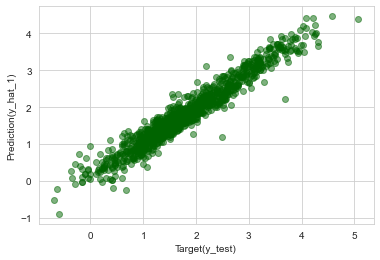

In [121]:
plt.scatter(y_test, y_hat_1, alpha=0.5, c='darkgreen')
plt.xlabel('Target(y_test)')
plt.ylabel('Prediction(y_hat_1)')

- **Checking Accuracy**:-

In [122]:
regressor_1.score(X_test,y_test) * 100          #checking accuracy

93.48342994821354

### Random Forest

In [123]:
regressor_2 = RandomForestRegressor(random_state=42)
regressor_2.fit(X_train, y_train)               #training the model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

- **Predicted Values by model**:-

In [124]:
y_hat_2 = regressor_2.predict(X_test)
print(y_hat_2)             #Predicted values by model

[1.68333866 1.69284362 2.03610881 ... 2.5310141  1.92294482 1.74831055]


- **Actual Values**:-

In [125]:
print(y_test)          #Actual values

1315    1.749200
5825    1.749200
1744    2.079442
1860    1.774952
1559    1.337629
          ...   
2855    3.500439
2316    1.609438
5573    2.590767
3140    1.662030
2857    1.558145
Name: Price, Length: 1204, dtype: float64


In [126]:
# print(type(y_hat_2), y_hat_2.shape)
# print(type(y_test), y_test.shape)

- **Tabular Representation of Actual and Predicted Values**:-

In [127]:
regressor_2_s1 = pd.Series(y_test, name='Actual Values')
regressor_2_s2 = pd.Series(y_hat_2, name='Prediction by Random Forest Algorithm')

regressor_2_s1 = regressor_2_s1.reset_index(drop=True)
regressor_2_s2 = regressor_2_s2.reset_index(drop=True)

pd.concat([regressor_2_s1,regressor_2_s2], axis=1)

,Actual Values,Prediction by Random Forest Algorithm
0,1.749200,1.683339
1,1.749200,1.692844
2,2.079442,2.036109
3,1.774952,1.601037
4,1.337629,1.572556
...,...,...
1199,3.500439,3.382303
1200,1.609438,1.779116
1201,2.590767,2.531014
1202,1.662030,1.922945


- **Checking Error**:-

In [128]:
print(mean_squared_error(y_test, y_hat_2))       #checking error

0.04405425743781364


- **Graph to visualize Accuracy**:-

Text(0, 0.5, 'Prediction(y_hat_2)')

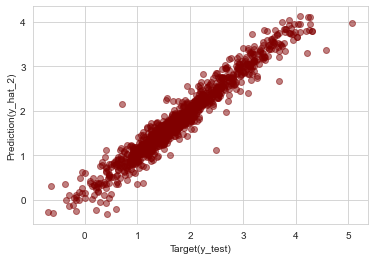

In [129]:
plt.scatter(y_test, y_hat_2, alpha=0.5, c='maroon')
plt.xlabel('Target(y_test)')
plt.ylabel('Prediction(y_hat_2)')

- **Checking Accuracy**:-

In [130]:
regressor_2.score(X_test,y_test) * 100      #checking accuracy

94.35357695466267

### Decision Tree

In [131]:
regressor_3 = DecisionTreeRegressor(random_state=42)
regressor_3.fit(X_train, y_train)               #training the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

- **Predicted Values by model**:-

In [132]:
y_hat_3 = regressor_3.predict(X_test)
print(y_hat_3)              #Predicted values by model

[1.58923521 1.54329811 1.84054963 ... 2.55022612 2.01490302 1.69561561]


- **Actual Values**:-

In [133]:
print(y_test)           #Actual values

1315    1.749200
5825    1.749200
1744    2.079442
1860    1.774952
1559    1.337629
          ...   
2855    3.500439
2316    1.609438
5573    2.590767
3140    1.662030
2857    1.558145
Name: Price, Length: 1204, dtype: float64


In [134]:
# print(type(y_hat_3), y_hat_3.shape)
# print(type(y_test), y_test.shape)

- **Tabular Representation of Actual and Predicted Values**:-

In [135]:
regressor_3_s1 = pd.Series(y_test, name='Actual Values')
regressor_3_s2 = pd.Series(y_hat_3, name='Prediction by Decision Tree Algorithm')

regressor_3_s1 = regressor_3_s1.reset_index(drop=True)
regressor_3_s2 = regressor_3_s2.reset_index(drop=True)

pd.concat([regressor_3_s1,regressor_3_s2], axis=1)

,Actual Values,Prediction by Decision Tree Algorithm
0,1.749200,1.589235
1,1.749200,1.543298
2,2.079442,1.840550
3,1.774952,1.252763
4,1.337629,1.766442
...,...,...
1199,3.500439,3.433987
1200,1.609438,1.871802
1201,2.590767,2.550226
1202,1.662030,2.014903


- **Checking Error**:-

In [136]:
print(mean_squared_error(y_test, y_hat_3))      #checking error

0.08491517160530414


- **Graph to visualize Accuracy**:-

Text(0, 0.5, 'Prediction(y_hat_3)')

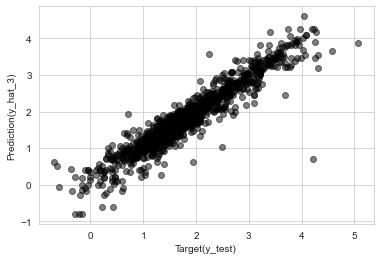

In [137]:
plt.scatter(y_test, y_hat_3, alpha=0.5, c='black')
plt.xlabel('Target(y_test)')
plt.ylabel('Prediction(y_hat_3)')

- **Checking Accuracy**:-

In [138]:
regressor_3.score(X_test, y_test) * 100         #checking accuracy

89.11644390947296

### Ridge Regression

In [139]:
regressor_4 = Ridge(random_state = 42, alpha=0.1)
regressor_4.fit(X_train, y_train)              #training the model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=42, solver='auto', tol=0.001)

In [140]:
regressor_4.intercept_

-231.16568750148835

In [141]:
regressor_1.coef_

array([ 1.13448254e-01, -7.10705067e-02, -1.11256713e-02,  2.96035661e-01,
        7.10334333e-01,  4.73580547e-02,  5.94130523e-02,  3.48283107e-01,
        3.44357786e-01,  1.16549033e+00, -5.94161800e-01, -6.13321772e-01,
       -5.30026390e-01, -2.33923797e-01, -3.45186393e-01, -2.89011828e-01,
       -2.90489542e-01, -6.23320602e-01,  4.42643765e-01, -1.07757928e-01,
        1.58468388e+00,  7.15747803e-01, -4.55255700e-01, -2.30558581e-01,
        3.74853659e-01,  6.92320143e-01, -5.34069020e-02, -3.15496929e-01,
        5.46258234e-01, -3.01172606e-01, -2.50398829e-01, -5.38458167e-15,
       -7.05311498e-01, -7.87740795e-02, -3.09827445e-01,  1.12763916e-01,
        1.36469992e-01,  1.94471114e-02,  1.05569019e-01, -8.88380647e-02,
        1.08859186e-01, -4.68131659e-02, -3.71532285e-02, -2.49424380e-01,
       -6.76783715e-02, -5.00046036e-02,  1.16717963e-01,  1.61070555e+00,
       -6.14449078e-02, -1.00968199e-01, -9.65797495e-02])

- **Predicted Values by model**:-

In [142]:
y_hat_4 = regressor_4.predict(X_test)
print(y_hat_4)              #Predicted values by model

[1.65290005 1.90512136 2.02372796 ... 2.46169526 2.0911878  1.85630366]


- **Actual Values**:-

In [143]:
print(y_test)                 #Actual values

1315    1.749200
5825    1.749200
1744    2.079442
1860    1.774952
1559    1.337629
          ...   
2855    3.500439
2316    1.609438
5573    2.590767
3140    1.662030
2857    1.558145
Name: Price, Length: 1204, dtype: float64


In [144]:
# print(type(y_hat_4), y_hat_4.shape)
# print(type(y_test), y_test.shape)

- **Tabular Representation of Actual and Predicted Values**:-

In [145]:
regressor_4_s1 = pd.Series(y_test, name='Actual Values')
regressor_4_s2 = pd.Series(y_hat_4, name='Prediction by Ridge Regression Algorithm')

regressor_4_s1 = regressor_4_s1.reset_index(drop=True)
regressor_4_s2 = regressor_4_s2.reset_index(drop=True)

pd.concat([regressor_4_s1,regressor_4_s2], axis=1)

,Actual Values,Prediction by Ridge Regression Algorithm
0,1.749200,1.652900
1,1.749200,1.905121
2,2.079442,2.023728
3,1.774952,1.569439
4,1.337629,1.403696
...,...,...
1199,3.500439,3.483427
1200,1.609438,1.636379
1201,2.590767,2.461695
1202,1.662030,2.091188


- **Checking Error**:-

In [146]:
print(mean_squared_error(y_test, y_hat_4))      #checking error

0.05086553568013472


- **Graph to visualize Accuracy**:-

Text(0, 0.5, 'Prediction(y_hat_4)')

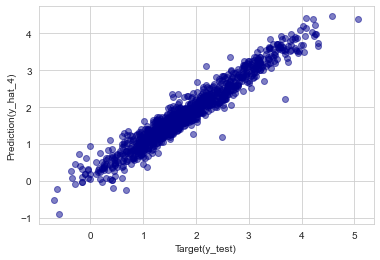

In [147]:
plt.scatter(y_test, y_hat_4, alpha=0.5, c='darkblue')
plt.xlabel('Target(y_test)')
plt.ylabel('Prediction(y_hat_4)')

- **Checking Accuracy**:-

In [148]:
regressor_4.score(X_test, y_test) * 100            #checking accuracy

93.48057714323843

### Lasso Regression

In [149]:
regressor_5 = Lasso(random_state = 42, alpha=0.1)
regressor_5.fit(X_train, y_train)              #training the model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [150]:
regressor_5.intercept_

-273.1566787404852

In [151]:
regressor_5.coef_

array([ 0.13568735, -0.        , -0.054111  ,  0.        ,  0.61547311,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.03798711,  0.        , -0.        , -0.08071663,
       -0.06101031])

- **Predicted Values by model**:-

In [152]:
y_hat_5 = regressor_5.predict(X_test)
print(y_hat_5)              #Predicted values by model

[1.72088383 1.99736951 1.93404899 ... 2.55058482 1.79561294 1.70579739]


- **Actual Values**:-

In [153]:
print(y_test)                 #Actual values

1315    1.749200
5825    1.749200
1744    2.079442
1860    1.774952
1559    1.337629
          ...   
2855    3.500439
2316    1.609438
5573    2.590767
3140    1.662030
2857    1.558145
Name: Price, Length: 1204, dtype: float64


In [154]:
# print(type(y_hat_5), y_hat_5.shape)
# print(type(y_test), y_test.shape)

- **Tabular Representation of Actual and Predicted Values**:-

In [155]:
regressor_5_s1 = pd.Series(y_test, name='Actual Values')
regressor_5_s2 = pd.Series(y_hat_5, name='Prediction by Lasso Regression Algorithm')

regressor_5_s1 = regressor_5_s1.reset_index(drop=True)
regressor_5_s2 = regressor_5_s2.reset_index(drop=True)

pd.concat([regressor_5_s1,regressor_5_s2], axis=1)

,Actual Values,Prediction by Lasso Regression Algorithm
0,1.749200,1.720884
1,1.749200,1.997370
2,2.079442,1.934049
3,1.774952,1.703620
4,1.337629,1.421110
...,...,...
1199,3.500439,3.313062
1200,1.609438,1.810319
1201,2.590767,2.550585
1202,1.662030,1.795613


- **Checking Error**:-

In [156]:
print(mean_squared_error(y_test, y_hat_5))      #checking error

0.19419858674468668


- **Graph to visualize Accuracy**:-

Text(0, 0.5, 'Prediction(y_hat_5)')

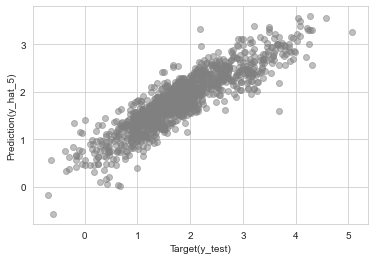

In [157]:
plt.scatter(y_test, y_hat_5, alpha=0.5, c='grey')
plt.xlabel('Target(y_test)')
plt.ylabel('Prediction(y_hat_5)')

- **Checking Accuracy**:-

In [158]:
regressor_5.score(X_test, y_test) * 100            #checking accuracy

75.10961620190784

### Linear Regression using "statsmodel.api"

In [159]:
X_train = sm.add_constant(X_train)

In [160]:
model = sm.OLS(y_train, X_train)

In [161]:
results = model.fit()

In [162]:
results.params

const                 -2.233226e+02
Year                   1.134483e-01
Kilometers_Driven     -7.107051e-02
Mileage               -1.112567e-02
Engine                 2.960357e-01
Power                  7.103343e-01
Seats                  4.735805e-02
Owner_Type_encoded     5.941305e-02
Name_Audi             -7.627523e+00
Name_BMW              -7.631448e+00
Name_Bentley          -6.810316e+00
Name_Chevrolet        -8.569968e+00
Name_Datsun           -8.589128e+00
Name_Fiat             -8.505832e+00
Name_Force            -8.209730e+00
Name_Ford             -8.320992e+00
Name_Honda            -8.264818e+00
Name_Hyundai          -8.266296e+00
Name_ISUZU            -8.599127e+00
Name_Jaguar           -7.533162e+00
Name_Jeep             -8.083564e+00
Name_Lamborghini      -6.391122e+00
Name_Land Rover       -7.260058e+00
Name_Mahindra         -8.431062e+00
Name_Maruti           -8.206365e+00
Name_Mercedes-Benz    -7.600952e+00
Name_Mini             -7.283486e+00
Name_Mitsubishi       -8.029

In [163]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1325.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:20:00   Log-Likelihood:                 290.00
No. Observations:                4813   AIC:                            -480.0
Df Residuals:                    4763   BIC:                            -156.0
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -223.3226    